# <center> VAI Store - Análise Exploratória de Dados </center>

---

Nesse jupyter notebook iremos analisar os dados de produtos e vendas da VAI Store

## 1. Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## 2. Dataset

In [3]:
produtos = pd.read_csv('../data/raw/produto.csv', index_col = 0)

# Leitura dos dados
produtos.info()
produtos.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 3.0 to nan
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NOME_PRODUTO  6499 non-null   object
 1   CATEGORIA     4498 non-null   object
 2   SUBCATEGORIA  4498 non-null   object
dtypes: object(3)
memory usage: 203.1+ KB


,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
SKU,,,
3.0,COCO RALADO GROSSO KG ...,Doceria,Confeitaria
4.0,ICE TEA LEAO LATA 340ML ...,NaN,NaN
5.0,TAHINE ISTAMBUL 200G ...,Pelo Mundo,Pastas Árabes
6.0,AMENDOIM MOIDO KG ...,Castanhas & Oleaginosas,Oleaginosas moídas
7.0,HALAWI ISTAMBUL LATA 500G ...,Pelo Mundo,Pastas Árabes


Sumário das colunas:
* SKU = Código do produto 
* NOME_PRODUTO = Descrição do produto 
* CATEGORIA = Categoria do produto 
* SUBCATEGORIA = Subcategoria do produto

In [4]:
vendas = pd.read_csv('../data/raw/vendas.csv', index_col = 0)

# Leitura dos dados
vendas.info()
vendas.head()

<class 'pandas.core.frame.DataFrame'>
Index: 556198 entries, 000304564.299.0101042.20240102 to 000503479.257.0101032.20241231
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   COD_VENDA    556198 non-null  object 
 1   COD_FILIAL   556198 non-null  int64  
 2   FILIAL       556198 non-null  object 
 3   DATA_ATEND   556198 non-null  object 
 4   SKU          556198 non-null  int64  
 5   UNID         556198 non-null  object 
 6   QTD_VENDA    556198 non-null  float64
 7   FATUR_VENDA  556198 non-null  float64
 8   CLI_CPF      556198 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 42.4+ MB


,COD_VENDA,COD_FILIAL,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF
COD_ATEND,,,,,,,,,
000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,101042,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220
000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,101032,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf
000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055
000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe
000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,101032,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394


Sumário das colunas:
* COD_ATEND = Código identificador do atendimento 
* COD_VENDA = Código identificador da venda 
* COD_FILIAL = Indica em qual loja foi feito o atendimento 
* FILIAL = Tipo de filial (Loja de Rua ou de Shopping) 
* DATA_ATEND = Data de atendimento daquele cliente a respeito daquele produto 
* SKU = Código do produto 
* UNID = Indica tipo do produto (granel ou prateleira) 
* QTD_VENDA = Quantidade vendida do produto 
* FATUR_VENDA  = Faturamento 
* CLI_CPF = Código do cliente

In [5]:
produtos.shape

(6500, 3)

## 3. Tratamento

### 3.1. Conversão de tipos de dados

In [6]:
# Conversão de COD_FILIAL e SKU para 'object'
vendas['COD_FILIAL'] = vendas['COD_FILIAL'].astype('object')
vendas['SKU'] = vendas['SKU'].astype('object')

# Conversão de DATA_ATEND para 'date'
vendas['DATA_ATEND'] = pd.to_datetime(vendas['DATA_ATEND'])

In [7]:
vendas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556198 entries, 000304564.299.0101042.20240102 to 000503479.257.0101032.20241231
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   COD_VENDA    556198 non-null  object        
 1   COD_FILIAL   556198 non-null  object        
 2   FILIAL       556198 non-null  object        
 3   DATA_ATEND   556198 non-null  datetime64[ns]
 4   SKU          556198 non-null  object        
 5   UNID         556198 non-null  object        
 6   QTD_VENDA    556198 non-null  float64       
 7   FATUR_VENDA  556198 non-null  float64       
 8   CLI_CPF      556198 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 42.4+ MB


### 3.2. Tratamento de valores ausentes

In [8]:
vendas.isna().sum()

COD_VENDA      0
COD_FILIAL     0
FILIAL         0
DATA_ATEND     0
SKU            0
UNID           0
QTD_VENDA      0
FATUR_VENDA    0
CLI_CPF        0
dtype: int64

In [9]:
produtos.isna().sum()

NOME_PRODUTO       1
CATEGORIA       2002
SUBCATEGORIA    2002
dtype: int64

Observa-se que, no dataset de **produtos**, há a presença de valores nulos em todas as colunas. Sendo assim, vamos analisar caso a caso.

#### 3.2.1. CATEGORIA e SUBCATEGORIA

Para essas colunas categóricas, vamos substituir os valores ausentes por um novo tipo: **'Sem categoria'** e **'Sem subcategoria'**.

In [10]:
produtos['CATEGORIA'] = produtos['CATEGORIA'].fillna('Sem categoria')
produtos['SUBCATEGORIA'] = produtos['SUBCATEGORIA'].fillna('Sem subcategoria')

#### 3.2.2. NOME_PRODUTO

In [11]:
produtos[produtos['NOME_PRODUTO'].isna()]

,NOME_PRODUTO,CATEGORIA,SUBCATEGORIA
SKU,,,
NaN,NaN,Sem categoria,Sem subcategoria


Nesse caso, a linha é constituída apenas de valores nulos e, além disso, não há a possibilidade desse produto ter um relacionamento com alguma venda. Sendo assim, vamos simplesmente **remover** essa observação.

In [12]:
produtos.dropna(inplace=True)

In [13]:
# Quantidade de valores nulos pós tratamento
produtos.isna().sum()

NOME_PRODUTO    0
CATEGORIA       0
SUBCATEGORIA    0
dtype: int64

### 3.3. Limpeza de strings

Na coluna NOME_PRODUTO, os valores possuem espaços em branco após o último caracter. Por isso, vamos remover essas lacunas.

In [14]:
produtos['NOME_PRODUTO'] = produtos['NOME_PRODUTO'].str.strip()

In [ ]:
# Nome dos produtos após tratamento
produtos['NOME_PRODUTO']

SKU
3.0                                     COCO RALADO GROSSO KG
4.0                                   ICE TEA LEAO LATA 340ML
5.0                                      TAHINE ISTAMBUL 200G
6.0                                         AMENDOIM MOIDO KG
7.0                                 HALAWI ISTAMBUL LATA 500G
                                  ...                        
171803.0     CREME DE LEITE DOCE ECILA 35% GARRAFA 450G 30261
171874.0                       BARRA BOLD BAR BANOFFEE 60G NV
171877.0    VINHO CASIL.D.CARNAVAL SPECTACULAR CARBENET 75...
171878.0    VINHO CASIL.D.CARNAVAL FANTASTIC SWEET 750ML C...
171887.0                BATATA PALHA EXTRA FINA VISCONTI 100G
Name: NOME_PRODUTO, Length: 6499, dtype: object

## 4. EDA

### 4.1. Análise do catálogo de produtos

Agora vamos entender quais as **principais categorias de produtos** vendidos pela VAI Store

Total de produtos no catálogo: 6499
Total de produtos com categoria definida: 6499
                CATEGORIA  PERCENTUAL
0           Sem categoria   30.789352
1             Suplementos    5.462379
2              Lanchonete    5.277735
3     Vinhos & Espumantes    4.354516
4              Guloseimas    3.631328
5                 Doceria    3.246653
6                   Natal    2.815818
7    Massas & Panificação    2.723496
8  Temperos & Condimentos    2.615787
9                   Frios    2.461917


/tmp/ipykernel_206020/2973083339.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


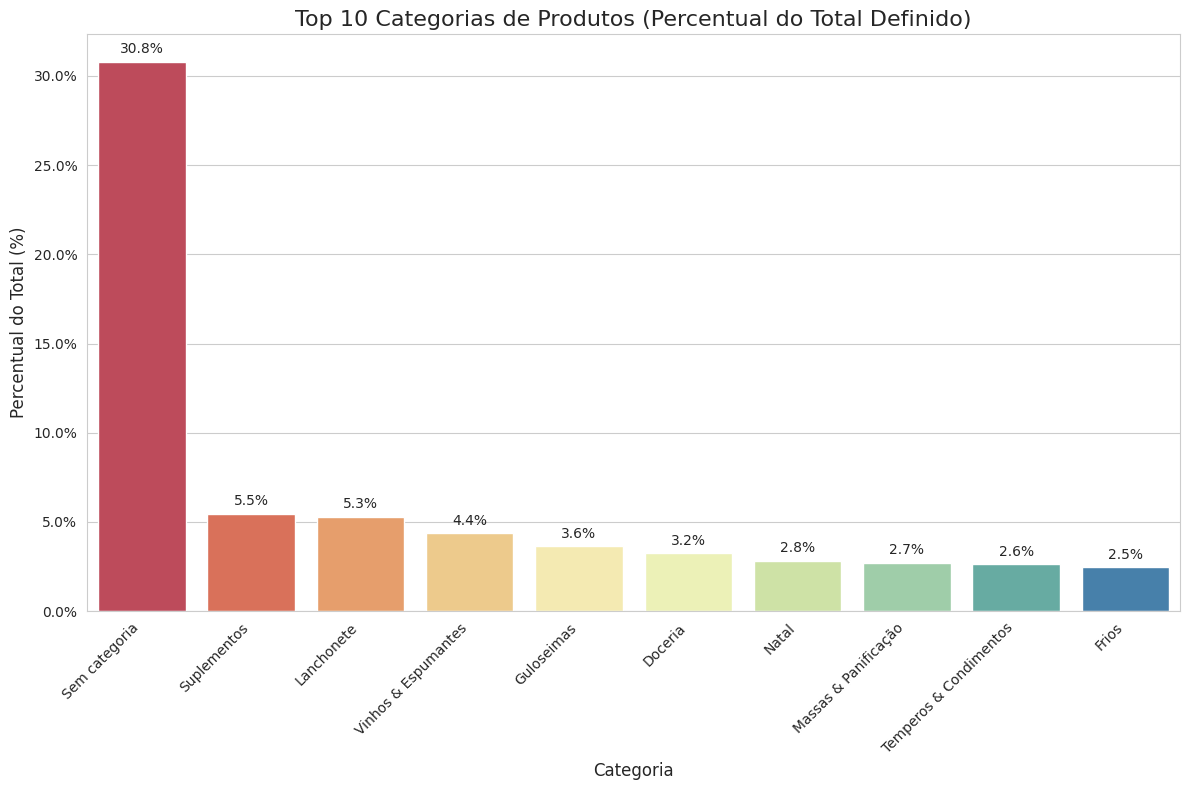

In [16]:
#Configuração inicial
sns.set_style("whitegrid")

# Remover produtos que não possuem categoria (valores NaN)
produtos_clean_categoria = produtos.dropna(subset=['CATEGORIA'])

print(f"Total de produtos no catálogo: {len(produtos)}")
print(f"Total de produtos com categoria definida: {len(produtos_clean_categoria)}")

#Cálculo de Percentuais 
# 1. Contar a frequência de cada categoria e calcular o percentual (normalize=True)
#    Isso usa o total de df_produtos_clean como denominador.
# 2. Selecionar o Top 10
top_10_cat = produtos_clean_categoria['CATEGORIA'].value_counts(normalize=True).head(10)

# 3. Converter a Series para um DataFrame
top_10_df = top_10_cat.reset_index()

# 4. Renomear as colunas
top_10_df.columns = ['CATEGORIA', 'PERCENTUAL']

# 5. Converter o percentual de (0.0 a 1.0) para (0 a 100) para exibição
top_10_df['PERCENTUAL'] = top_10_df['PERCENTUAL'] * 100

print(top_10_df)

#Geração do Gráfico
# 1. Criar a figura (figsize(largura, altura))
plt.figure(figsize=(12, 8))

# 2. Criar o gráfico de barras
#    Os dados já estão ordenados por 'value_counts'
ax = sns.barplot(
    data=top_10_df,
    x='CATEGORIA',
    y='PERCENTUAL',
    palette='Spectral' # Paleta de cores
)

# 3. Adicionar títulos e rótulos
ax.set_title('Top 10 Categorias de Produtos (Percentual do Total Definido)', fontsize=16)
ax.set_xlabel('Categoria', fontsize=12)
ax.set_ylabel('Percentual do Total (%)', fontsize=12)

# 4. Formatar o eixo Y para exibir o símbolo de '%'
#    Usamos FuncFormatter pois os dados já estão na escala 0-100
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1f}%'))

# 5. Adicionar os rótulos de dados (percentuais) acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato do texto (1 casa decimal)
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
                   ha = 'center', va = 'center', # Alinhamento
                   xytext = (0, 9), # Deslocamento vertical de 9 pontos
                   textcoords = 'offset points',
                   fontsize=10)

# 6. Rotacionar os rótulos do eixo X (categorias) para evitar sobreposição
plt.xticks(rotation=45, ha='right')

# 7. Ajustar o layout para garantir que os rótulos não sejam cortados
plt.tight_layout()

# 8. Salvar e exibir o gráfico
plt.savefig('../graphics/top_10_categorias.png') # Salva a imagem
plt.show() # Exibe no notebook
plt.close() # Fecha a figura atual

Após conhecer as principais categorias de produtos vamos analisar as **principais subcategorias**

Total de produtos no catálogo: 6499
Total de produtos com subcategoria definida: 6499
        SUBCATEGORIA  PERCENTUAL
0   Sem subcategoria   30.789352
1        Suplementos    2.461917
2             Tintos    2.277273
3  Sucos e refrescos    2.077243
4             Cestas    1.877212
5       Ervas & Chás    1.784890
6          Barrinhas    1.677181
7            Queijos    1.554085
8            Cozinha    1.446376
9       Encapsulados    1.354054


/tmp/ipykernel_206020/3438568627.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


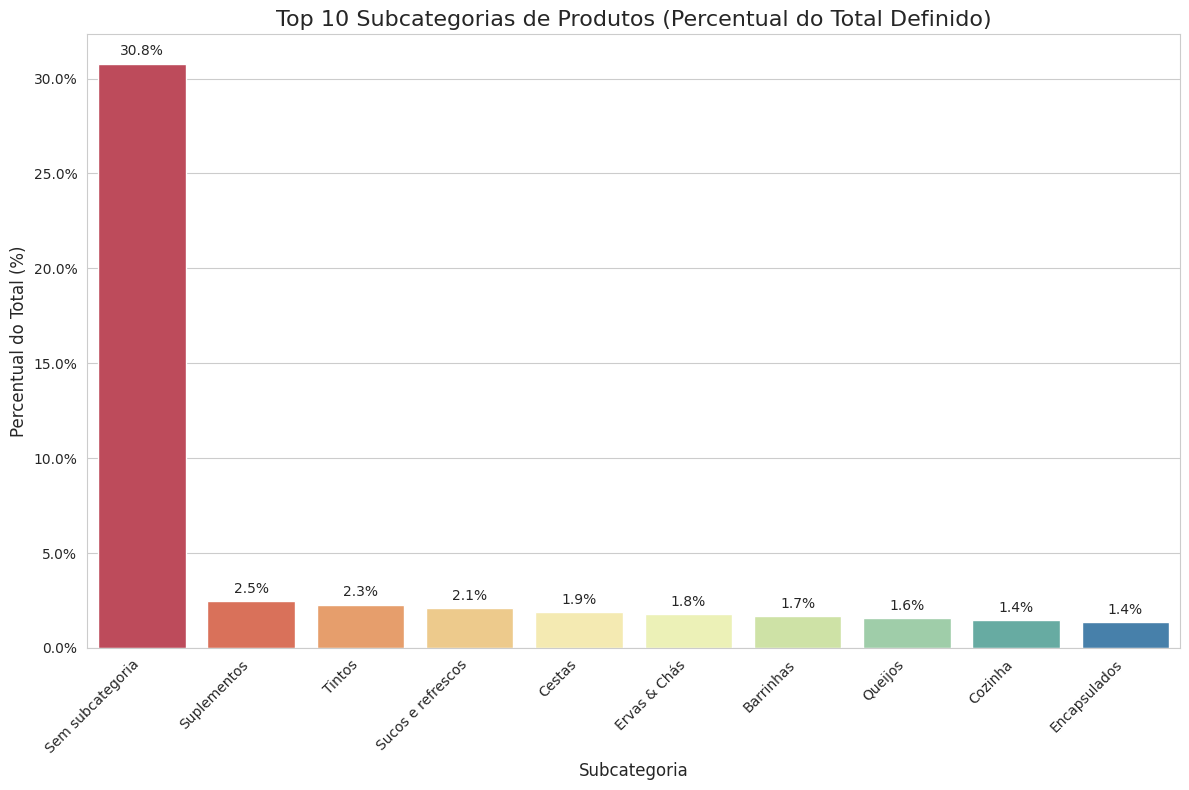

In [17]:
#Configuração inicial
sns.set_style("whitegrid")

# Remover produtos que não possuem categoria (valores NaN)
produtos_clean_subcategoria = produtos.dropna(subset=['SUBCATEGORIA'])

print(f"Total de produtos no catálogo: {len(produtos)}")
print(f"Total de produtos com subcategoria definida: {len(produtos_clean_subcategoria)}")

#Cálculo de Percentuais 
# 1. Contar a frequência de cada categoria e calcular o percentual (normalize=True)
#    Isso usa o total de df_produtos_clean como denominador.
# 2. Selecionar o Top 10
top_10_cat = produtos_clean_subcategoria['SUBCATEGORIA'].value_counts(normalize=True).head(10)

# 3. Converter a Series para um DataFrame
top_10_df = top_10_cat.reset_index()

# 4. Renomear as colunas
top_10_df.columns = ['SUBCATEGORIA', 'PERCENTUAL']

# 5. Converter o percentual de (0.0 a 1.0) para (0 a 100) para exibição
top_10_df['PERCENTUAL'] = top_10_df['PERCENTUAL'] * 100

print(top_10_df)

#Geração do Gráfico
# 1. Criar a figura (figsize(largura, altura))
plt.figure(figsize=(12, 8))

# 2. Criar o gráfico de barras
#    Os dados já estão ordenados por 'value_counts'
ax = sns.barplot(
    data=top_10_df,
    x='SUBCATEGORIA',
    y='PERCENTUAL',
    palette='Spectral' # Paleta de cores
)

# 3. Adicionar títulos e rótulos
ax.set_title('Top 10 Subcategorias de Produtos (Percentual do Total Definido)', fontsize=16)
ax.set_xlabel('Subcategoria', fontsize=12)
ax.set_ylabel('Percentual do Total (%)', fontsize=12)

# 4. Formatar o eixo Y para exibir o símbolo de '%'
#    Usamos FuncFormatter pois os dados já estão na escala 0-100
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y:.1f}%'))

# 5. Adicionar os rótulos de dados (percentuais) acima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  # Formato do texto (1 casa decimal)
                   (p.get_x() + p.get_width() / 2., p.get_height()), # Posição (x, y)
                   ha = 'center', va = 'center', # Alinhamento
                   xytext = (0, 9), # Deslocamento vertical de 9 pontos
                   textcoords = 'offset points',
                   fontsize=10)

# 6. Rotacionar os rótulos do eixo X (categorias) para evitar sobreposição
plt.xticks(rotation=45, ha='right')

# 7. Ajustar o layout para garantir que os rótulos não sejam cortados
plt.tight_layout()

# 8. Salvar e exibir o gráfico
plt.savefig('../graphics/top_10_subcategorias.png') # Salva a imagem
plt.show() # Exibe no notebook
plt.close() # Fecha a figura atual

Diante as informações acima podemos entender como o pool de produtos da VAI Store está estruturado atualmente

### 4.2. Análise do desempenho de vendas por filial

Agora vamos fazer a análise exploratória dos dados para as **vendas**. Podemos começar entendendo o faturamento de cada filial ao longo do ano


--- Faturamento Total Agrupado por Filial ---
     FILIAL  FATUR_VENDA
0       RUA   3801959.48
1  SHOPPING   4046767.45


/tmp/ipykernel_206020/1768725768.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


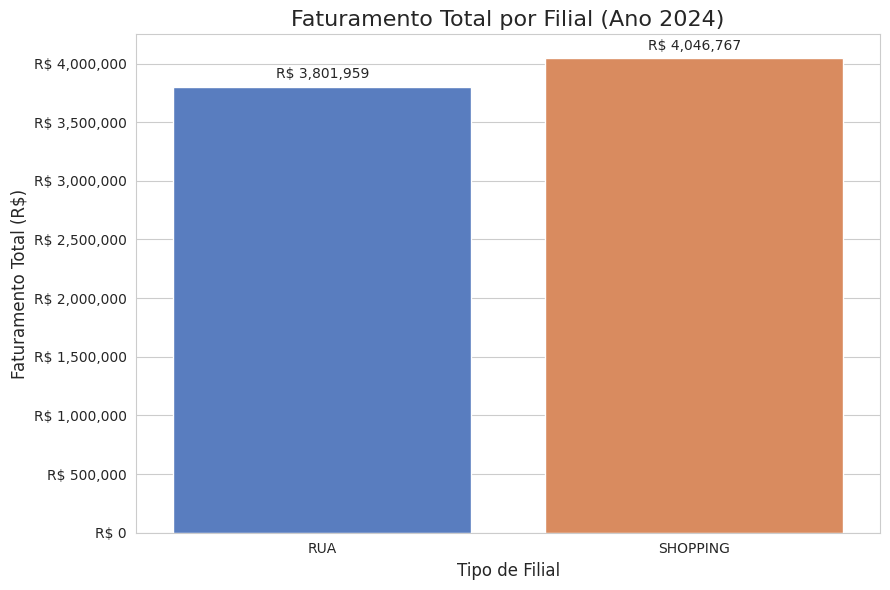

In [18]:
#1. Agrupamento dos Dados
# Agrupa diretamente por 'FILIAL' e soma o 'FATUR_VENDA'.
# Como sabemos que os dados são todos de 2024, este é o faturamento "anual".
df_faturamento_filial = vendas.groupby('FILIAL')['FATUR_VENDA'].sum().reset_index()

print("\n--- Faturamento Total Agrupado por Filial ---")
print(df_faturamento_filial)

#2. Geração do Gráfico

# Cria a figura
plt.figure(figsize=(9, 6))

# Cria o gráfico de barras
ax = sns.barplot(
    data=df_faturamento_filial,
    x='FILIAL',
    y='FATUR_VENDA',
    palette='muted'
)

# 3. Formatação e Rótulos

# Define o título
ax.set_title('Faturamento Total por Filial (Ano 2024)', fontsize=16)
ax.set_xlabel('Tipo de Filial', fontsize=12)
ax.set_ylabel('Faturamento Total (R$)', fontsize=12)

# Formata o eixo Y para moeda (R$)
formatter_currency = ticker.FuncFormatter(lambda x, p: f'R$ {x:,.0f}')
ax.yaxis.set_major_formatter(formatter_currency)

# Adiciona os rótulos de dados (valores) sobre as barras
for p in ax.patches:
    ax.annotate(f'R$ {p.get_height():,.0f}',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=10)

# --- 6. Salvamento ---
plt.tight_layout() # Ajusta layout
plt.savefig("../graphics/faturamento_anual_por_filial.png") # Salva o gráfico
plt.show() # Exibe no notebook
plt.close() # Fecha a figura

Fica perceptível que há uma diferença de faturamento entre as filiais, então vamos destrinchar essa receita um pouco mais

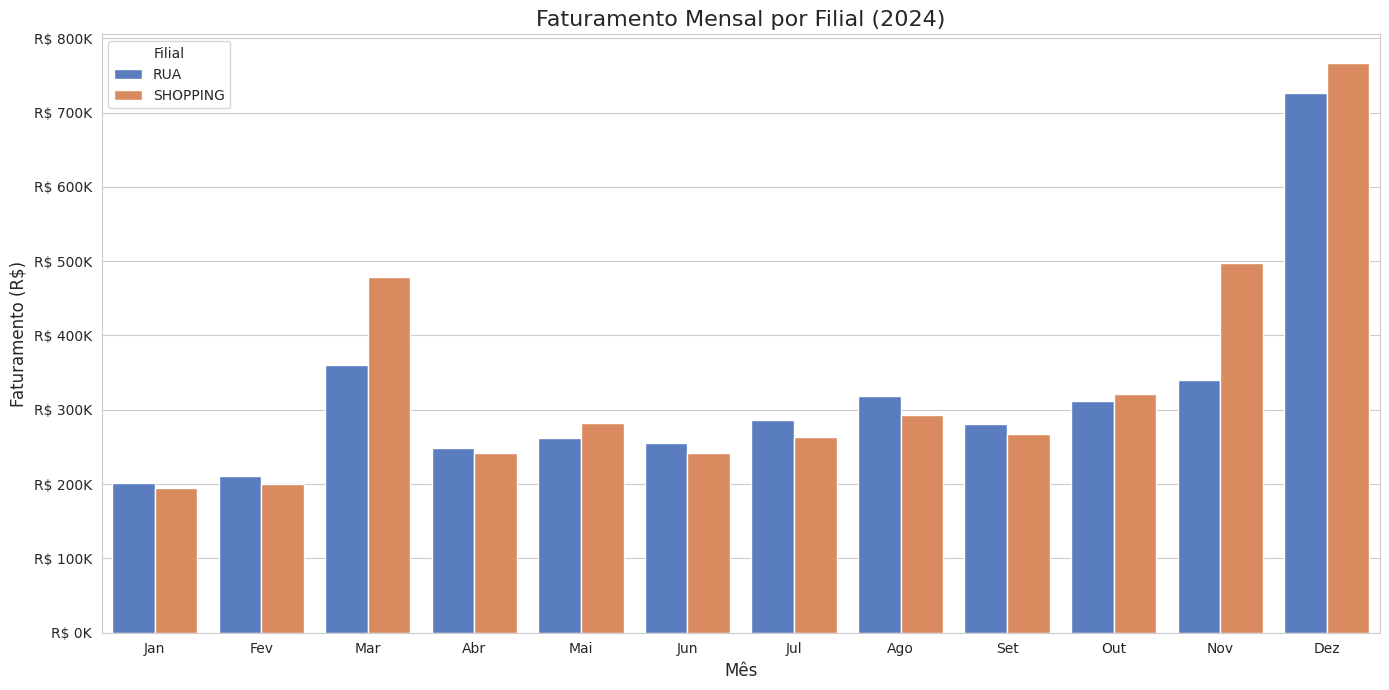

In [19]:
#1. Preparação dos Dados
# Converte 'DATA_ATEND' para datetime (necessário para extrair o mês)
# Se você já fez isso em outra célula, pode pular esta linha
vendas['DATA_ATEND'] = pd.to_datetime(vendas['DATA_ATEND'])

# Extrai o número do mês
vendas['MES_NUM'] = vendas['DATA_ATEND'].dt.month

#2. Agrupamento dos Dados
# Agrupa por Mês (número) e Filial, somando o faturamento
df_mes_filial = vendas.groupby(['MES_NUM', 'FILIAL'])['FATUR_VENDA'].sum().reset_index()

#3. Mapeamento de Meses
# Cria um mapa de número do mês para nome
mes_map = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}

# Cria uma coluna com os nomes dos meses
df_mes_filial['MES_NOME'] = df_mes_filial['MES_NUM'].map(mes_map)

# Cria uma lista ordenada dos nomes dos meses para usar no gráfico
meses_ordenados = list(mes_map.values())

#4. Geração do Gráfico
# Define o tamanho da figura (mais larga para caber os 12 meses)
plt.figure(figsize=(14, 7))

# Cria o gráfico de barras agrupado
ax = sns.barplot(
    data=df_mes_filial,
    x='MES_NOME',       # Nomes dos meses no eixo X
    y='FATUR_VENDA',    # Faturamento no eixo Y
    hue='FILIAL',       # Agrupar cores por Filial
    order=meses_ordenados, # Garante a ordem correta (Jan, Fev, Mar...)
    palette='muted'
)

#5. Formatação e Rótulos

# Define o título
ax.set_title('Faturamento Mensal por Filial (2024)', fontsize=16)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Faturamento (R$)', fontsize=12)

# Formata o eixo Y para R$ K (Milhares)
formatter = ticker.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K')
ax.yaxis.set_major_formatter(formatter)

# Ajusta a legenda
ax.legend(title='Filial', loc='upper left')

#6. Salvamento 
plt.tight_layout()
plt.savefig('../graphics/faturamento_mensal_agrupado.png')
plt.show()
plt.close()

Será que a diferença do faturamento mensal está diretaamente ligada ao ticket médio de cada loja?

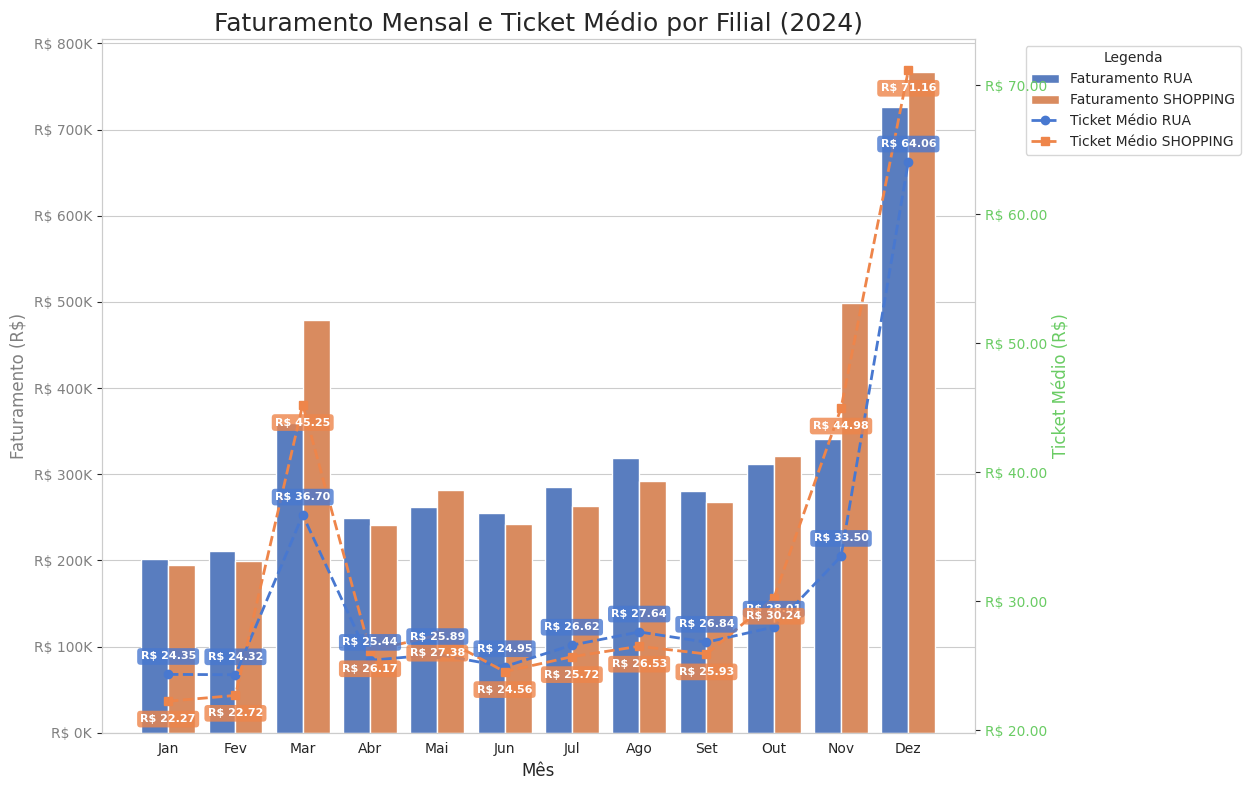

In [20]:
#1. Cálculo - Faturamento
df_mes_filial = vendas.groupby(['MES_NUM', 'FILIAL'])['FATUR_VENDA'].sum().reset_index()

#2. Cálculo - Ticket Médio (Gráfico de Linhas)
df_agregado_tm = vendas.groupby(['MES_NUM', 'FILIAL']).agg(
    FATUR_TOTAL=('FATUR_VENDA', 'sum'),
    CLIENTES_UNICOS=('CLI_CPF', 'nunique')
).reset_index()
df_agregado_tm['TICKET_MEDIO'] = df_agregado_tm['FATUR_TOTAL'] / df_agregado_tm['CLIENTES_UNICOS']

#3. Mapeamento e Ordenação de Meses
mes_map = {
    1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Abr',
    5: 'Mai', 6: 'Jun', 7: 'Jul', 8: 'Ago',
    9: 'Set', 10: 'Out', 11: 'Nov', 12: 'Dez'
}
meses_ordenados = list(mes_map.values())
df_mes_filial['MES_NOME'] = df_mes_filial['MES_NUM'].map(mes_map)
df_agregado_tm['MES_NOME'] = df_agregado_tm['MES_NUM'].map(mes_map)
df_agregado_tm = df_agregado_tm.sort_values(by='MES_NUM')
df_tm_rua = df_agregado_tm[df_agregado_tm['FILIAL'] == 'RUA']
df_tm_shopping = df_agregado_tm[df_agregado_tm['FILIAL'] == 'SHOPPING']

#4. Geração do Gráfico Combinado
palette_colors = sns.color_palette('muted')
color_rua = palette_colors[0]
color_shopping = palette_colors[1]
fig, ax = plt.subplots(figsize=(15, 8)) 

#Plotagem Gráfico de Barras (Eixo Esquerdo)
sns.barplot(
    data=df_mes_filial,
    x='MES_NOME',
    y='FATUR_VENDA',
    hue='FILIAL',
    order=meses_ordenados,
    palette='muted',
    ax=ax
)

# Formatação Eixo Esquerdo (Faturamento)
ax.set_title('Faturamento Mensal e Ticket Médio por Filial (2024)', fontsize=18)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Faturamento (R$)', fontsize=12, color='gray')
formatter_k = ticker.FuncFormatter(lambda x, p: f'R$ {x/1000:.0f}K')
ax.yaxis.set_major_formatter(formatter_k)
ax.tick_params(axis='y', labelcolor='gray')

#Plotagem Gráfico de Linhas (Eixo Direito)
ax2 = ax.twinx()
ax2.plot(df_tm_rua['MES_NOME'], df_tm_rua['TICKET_MEDIO'], 
         color=color_rua, 
         marker='o', 
         linestyle='--', 
         linewidth=2,
         label='Ticket Médio RUA')
ax2.plot(df_tm_shopping['MES_NOME'], df_tm_shopping['TICKET_MEDIO'], 
         color=color_shopping, 
         marker='s', 
         linestyle='--', 
         linewidth=2,
         label='Ticket Médio SHOPPING')

# Formatação Eixo Direito (Ticket Médio)
ax2.set_ylabel('Ticket Médio (R$)', fontsize=12, color=palette_colors[2]) 
formatter_tm = ticker.FuncFormatter(lambda x, p: f'R$ {x:.2f}')
ax2.yaxis.set_major_formatter(formatter_tm)
ax2.tick_params(axis='y', labelcolor=palette_colors[2])
ax2.grid(False) 

#5. Adicionar Rótulos (Caixas) ao Gráfico de Linhas

# Define um offset vertical para afastar os rótulos do ponto
vertical_offset = 1

# Rótulos para RUA (posicionados ACIMA do ponto)
for _, row in df_tm_rua.iterrows():
    ax2.text(row['MES_NOME'], row['TICKET_MEDIO'] + vertical_offset, # Offset POSITIVO
             f"R$ {row['TICKET_MEDIO']:.2f}", 
             color='white', 
             fontsize=8, 
             fontweight='bold',
             ha='center', 
             va='bottom', # Ancora na base do texto
             bbox=dict(boxstyle='round,pad=0.3', fc=color_rua, ec='none', alpha=0.8))

# Rótulos para SHOPPING (posicionados ABAIXO do ponto)
for _, row in df_tm_shopping.iterrows():
    ax2.text(row['MES_NOME'], row['TICKET_MEDIO'] - vertical_offset, # Offset NEGATIVO
             f"R$ {row['TICKET_MEDIO']:.2f}", 
             color='white', 
             fontsize=8, 
             fontweight='bold',
             ha='center', 
             va='top', # Ancora no topo do texto
             bbox=dict(boxstyle='round,pad=0.3', fc=color_shopping, ec='none', alpha=0.8))


#6. Salvamento e Legenda Combinada

# Pega os 'handles' (os ícones) e 'labels' (os textos) de cada eixo
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Renomeia os labels das barras para clareza
l1 = ['Faturamento RUA', 'Faturamento SHOPPING']

# Cria uma legenda única combinando as duas
ax.legend(h1 + h2, l1 + l2, 
          title='Legenda', 
          loc='upper left', 
          bbox_to_anchor=(1.05, 1), # Posição fora do gráfico
          fontsize=10)


# Ajusta o layout para caber a legenda (rect=[left, bottom, right, top])
fig.tight_layout(rect=[0, 0, 0.85, 1]) 
save_path = '../graphics/faturamento_e_ticket_medio_mensal.png'
plt.savefig(save_path)
plt.show()
plt.close(fig)

Podemos ver no gráfico acima que o faturamento da loja está correlacionado ao ticket médio dela e que o faturameto de março, novembro e dezembro foram os fatores motores para discrepância de faturamento anual entre a loja localizada na rua e a localizada no shopping. Podemos agora ver se nesses meses a loja do shopping recebeu mais clientes únicos do que a da rua

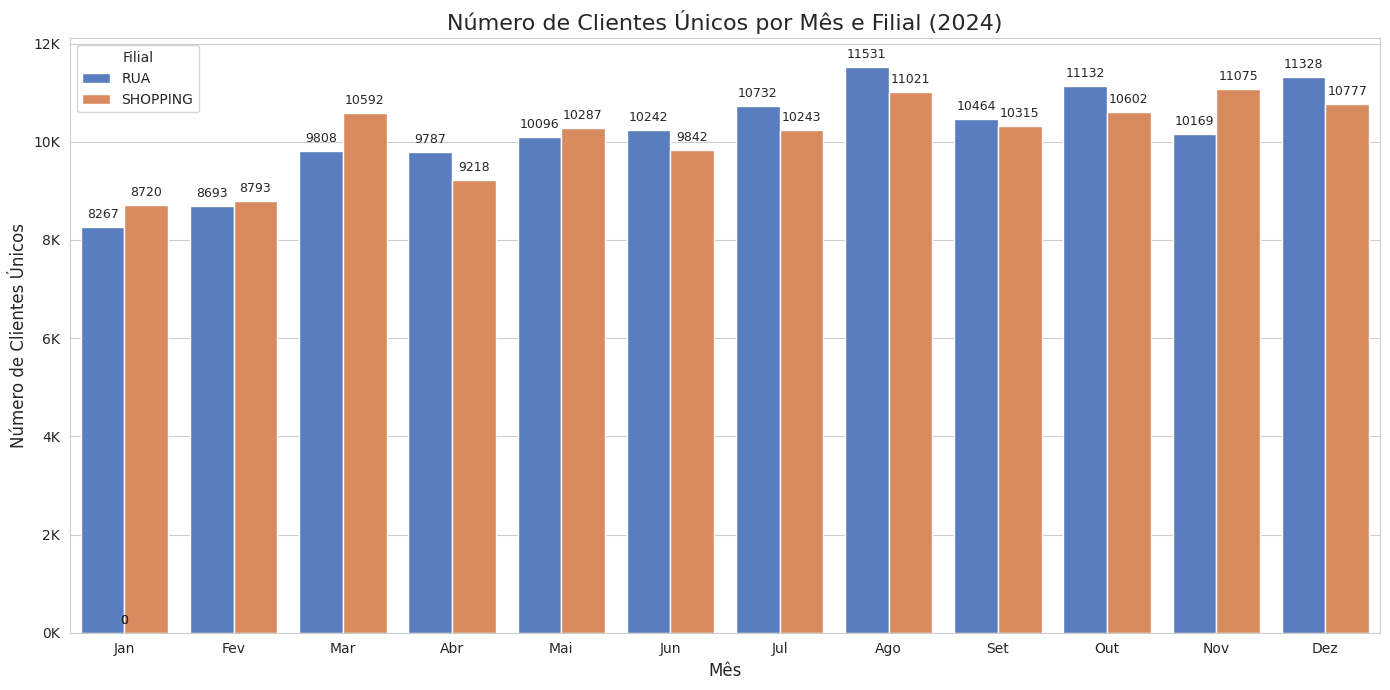

In [21]:
#1. Agrupamento dos Dados
# Agrupa por Mês (número) e Filial, contando os clientes únicos
df_clientes_unicos = vendas.groupby(['MES_NUM', 'FILIAL'])['CLI_CPF'].nunique().reset_index()
df_clientes_unicos['MES_NOME'] = df_clientes_unicos['MES_NUM'].map(mes_map)

#2. Geração do Gráfico 
plt.figure(figsize=(14, 7))
ax = sns.barplot(
    data=df_clientes_unicos,
    x='MES_NOME',
    y='CLI_CPF', # Esta é a coluna com a contagem de clientes
    hue='FILIAL',
    order=meses_ordenados,
    palette='muted'
)

#3. Formatação e Rótulos
ax.set_title('Número de Clientes Únicos por Mês e Filial (2024)', fontsize=16)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Número de Clientes Únicos', fontsize=12)

# Formatar o eixo Y para 'K' (milhares)
formatter_k_int = ticker.FuncFormatter(lambda x, p: f'{x/1000:.0f}K')
ax.yaxis.set_major_formatter(formatter_k_int)

# Adicionar rótulos de dados (contagem exata)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', # Formato inteiro
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontsize=9)

ax.legend(title='Filial', loc='upper left')

#4. Salvamento 
plt.tight_layout()
plt.savefig('../graphics/clientes_unicos_mensal_agrupado.png')
plt.show()
plt.close()

### 4.3. Análise da qualidade dos dados de cliente

Vamos ver se todas as compras registradas tem o CPF do cliente comprador associado ao produto vendido

In [22]:
nan_count_CPF = vendas['CLI_CPF'].isna().sum()
print(f"Número de valores ausentes na coluna 'CLI_CPF': {nan_count_CPF}")

Número de valores ausentes na coluna 'CLI_CPF': 0


Devido a informação de que todos as vendas da loja incluem a vinculação ao CPF do cliente, podemos extrair informações importantes sobre a persona dos compradores da VAI Store

In [23]:
vendas.head()

,COD_VENDA,COD_FILIAL,FILIAL,DATA_ATEND,SKU,UNID,QTD_VENDA,FATUR_VENDA,CLI_CPF,MES_NUM
COD_ATEND,,,,,,,,,,
000304564.299.0101042.20240102,000304564.299.0101042.20240102.000009.02,101042,SHOPPING,2024-01-02,9,KG,0.258,18.04,ec0abf3f4220,1
000374698.258.0101032.20240102,000374698.258.0101032.20240102.000009.10,101032,RUA,2024-01-02,9,KG,0.064,4.50,83d596ee0acf,1
000383551.256.0101032.20240102,000383551.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.164,11.49,46f63c18e055,1
000383533.256.0101032.20240102,000383533.256.0101032.20240102.000009.02,101032,RUA,2024-01-02,9,KG,0.202,14.13,6def1d35e2fe,1
000432095.257.0101032.20240102,000432095.257.0101032.20240102.000051.06,101032,RUA,2024-01-02,51,KG,0.086,6.87,1576e1a36394,1
